## Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('/home/summer/Desktop/job/coding projects/titanic/train.csv')
test = pd.read_csv('/home/summer/Desktop/job/coding projects/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (891, 12)
Dimension of test data (418, 11)


In [4]:
print ("Basic statistical description:")
train.describe()

Basic statistical description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### train and test datasets

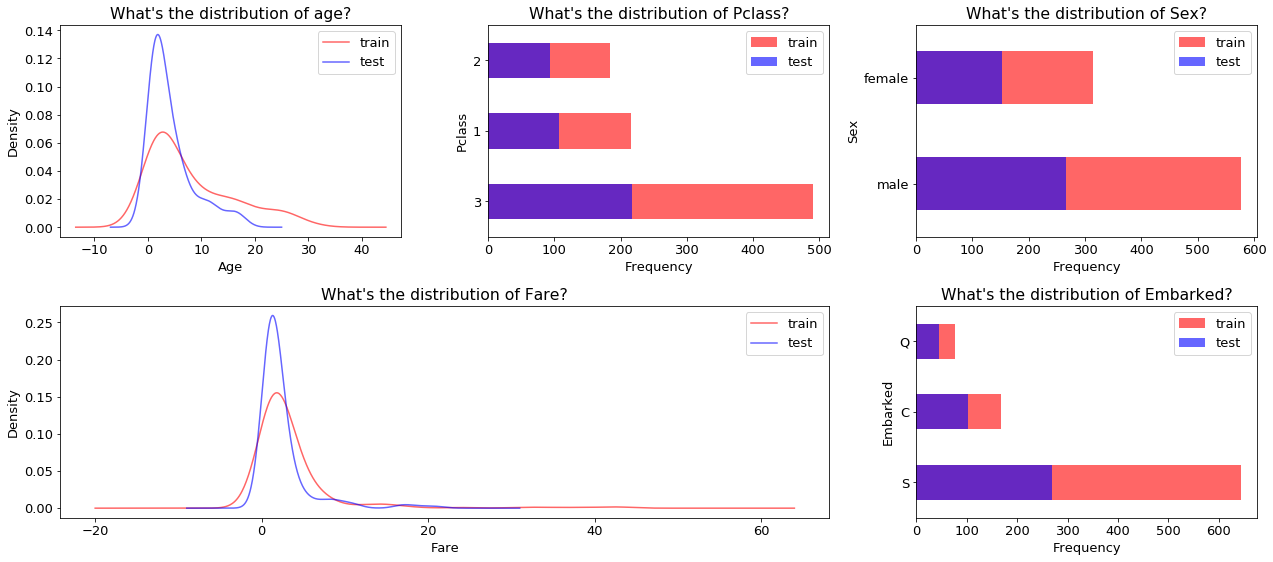

In [5]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.Age.value_counts().plot(kind='kde', color='red', label='train', alpha=alpha)
test.Age.value_counts().plot(kind='kde', color='blue', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.Pclass.value_counts().plot(kind='barh', color='red', label='train', alpha=alpha)
test.Pclass.value_counts().plot(kind='barh', color='blue', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='red', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', color='blue',label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Fare.value_counts().plot(kind='kde', color='red', label='train', alpha=alpha)
test.Fare.value_counts().plot(kind='kde', color='blue', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='barh', color='red', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', color='blue', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

In [6]:
print (train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


### train data

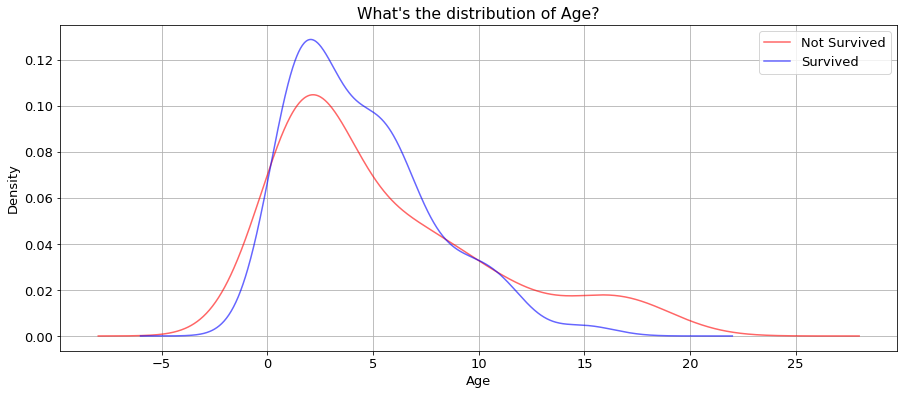

In [7]:
fig = plt.figure(figsize=(15, 6))

train[train.Survived==0].Age.value_counts().plot(kind='density', color='red', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='density', color='blue',label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

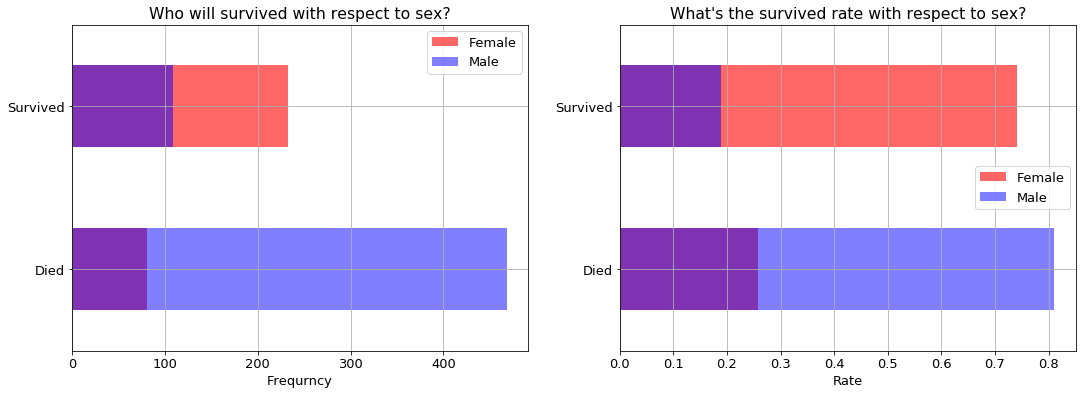

In [8]:
df_male = train[train.Sex=='male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
df_female.plot(kind='barh', color='red', label='Female', alpha=alpha)
df_male.plot(kind='barh', color='blue', label='Male', alpha=alpha-0.1)
ax1.set_xlabel('Frequrncy')
ax1.set_yticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='barh', color='red', label='Female', alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='barh', color='blue',label='Male', alpha=alpha-0.1)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()

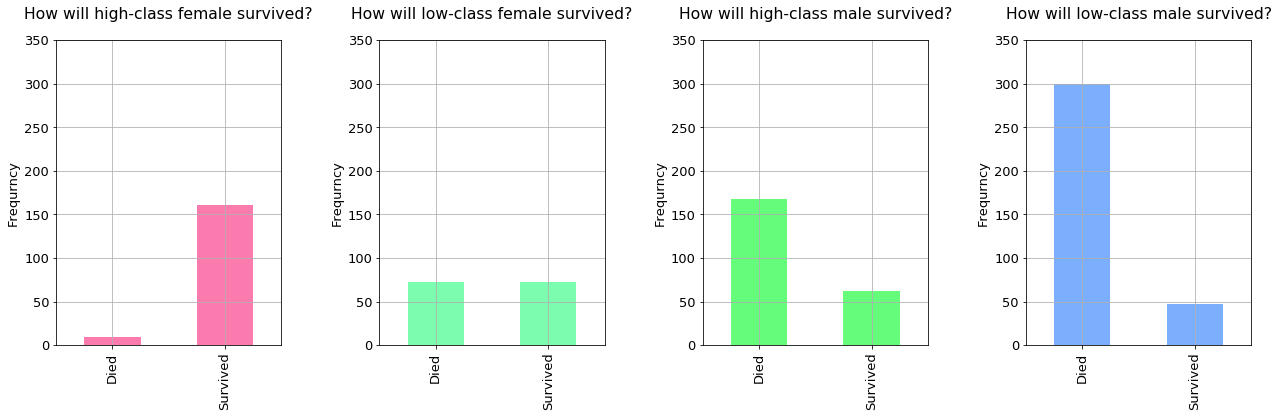

In [9]:
df_male = train[train.Sex=='male']
df_female = train[train.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequrncy')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

In [33]:
train[train.Ticket=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [34]:
train[train.Ticket=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


## Data cleaning

missing values we have on each column

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Missing values on Embarked

In [12]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


assume the embarked is related with fare and pclass.

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


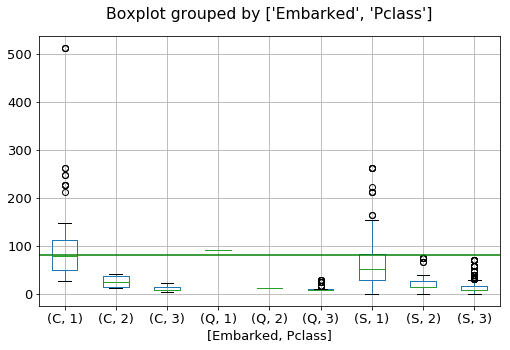

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = train.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

In [14]:
train[(train.Pclass == 1) & (train.Fare == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


assume the embarked is related with mode

In [15]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked', 'S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [17]:
train[(train.Pclass == 1) & (train.Fare == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


or

In [18]:
train["Embarked"] = train["Embarked"].fillna("S")

### Missing values on Fare
#### By fixing the values of Embarked and Pclass, we could plot histogram of Fare. And we should use the most common value to replace the NA value of Fare.

,Pclass,Fare,Embarked
152,3,NaN,S


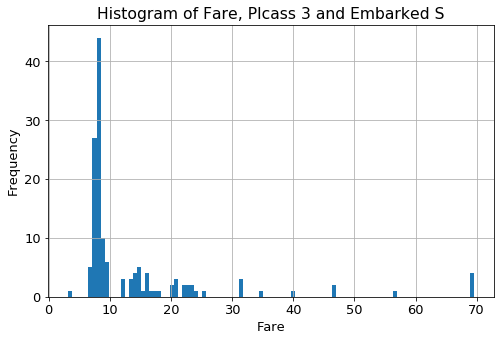

In [19]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.hist(bins=100, ax=ax)
test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare, Plcass 3 and Embarked S')

test[test.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]

In [20]:
print ("The top 5 most common value of Fare")
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

The top 5 most common value of Fare


8.0500    17
7.8958    10
7.7750    10
8.6625     8
7.8542     8
Name: Fare, dtype: int64

In [21]:
_ = test.set_value(test.Fare.isnull(), 'Fare', 8.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


#### Replace the missing value of Cabin with U0

In [22]:
full = pd.concat([train, test], ignore_index=True)
full[full.Cabin == 'U0']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [23]:
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


## Feature Engineering

#### Create a feature, Names, to store the length of words in name.

In [24]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [25]:
import re
names = full.Name.map(lambda x: len(re.split(' ', x)))
_ = full.set_value(full.index, 'Names', names)
del names

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


#### Create a feature, Title.

In [26]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


#### Create a feature, Deck. It may represents the socioeconomic status.

In [27]:
#train.Cabin.value_counts()
#train[~train.Cabin.isnull()].Cabin.map(lambda x: re.compile('\ ').findall(x))
train[~train.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group()).value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [28]:
# lower the number, higher the socioeconomic status
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


#### Create a feature, Room. It may represents the geo lacation.

In [29]:
checker = re.compile("([0-9]+)")
int(checker.search('U0').group()) +1

1

In [30]:
checker = re.compile("([0-9]+)")
def roomNum(x):
    nums = checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
rooms = full.Cabin.map(roomNum)
_ = full.set_value(full.index, 'Room', rooms)
del checker, roomNum
full['Room'] = full.Room/full.Room.sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [31]:
_

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Names,Title,Deck,Room
0,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,4,Mr,0,0.000064
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,7,Mrs,1,0.005496
2,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,3,Miss,0,0.000064
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,7,Mrs,1,0.007924
4,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,4,Mr,0,0.000064
5,NaN,U0,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,3,Mr,0,0.000064
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,4,Mr,2,0.003004
7,2.0,U0,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4,Master,0,0.000064
8,27.0,U0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,7,Mrs,0,0.000064
9,14.0,U0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,5,Mrs,0,0.000064


#### Create a feature, Group_num. It may represents the size of family.

In [32]:
full['Group_num'] = full.Parch + full.SibSp + 1

#### Create a feature, Group_size. When the size is between 2 and 4, more people are survived.

In [33]:
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Group_num>4, 'Group_size', 'L')
_ = full.set_value(full.Group_num==1, 'Group_size', 'S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


#### Normalized the fare.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['NorFare'] = pd.Series(scaler.fit_transform(full.Fare.values.reshape(-1,1)).reshape(-1), index=full.index)

In [51]:
def setValue(col):
    _ = train.set_value(train.index, col, full[:891][col].values)
    _ = test.set_value(test.index, col, full[891:][col].values)

for col in ['Deck', 'Room', 'Group_size', 'Group_num', 'Names', 'Title']:
    setValue(col)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


#### Predict Age

In [52]:
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'], axis=1, inplace=True)
full = pd.get_dummies(full, columns=['Embarked', 'Sex', 'Title', 'Group_size'])

In [53]:
full

,Age,Parch,Pclass,SibSp,Names,Deck,Room,Group_num,NorFare,Embarked_C,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Group_size_L,Group_size_M,Group_size_S
0,22.0,0,3,1,4,0,0.000064,2,-0.503176,0,...,0,0,0,1,0,0,0,0,1,0
1,38.0,0,1,1,7,1,0.005496,2,0.734809,1,...,0,0,0,0,1,0,0,0,1,0
2,26.0,0,3,0,3,0,0.000064,1,-0.490126,0,...,0,0,1,0,0,0,0,0,0,1
3,35.0,0,1,1,7,1,0.007924,2,0.383263,0,...,0,0,0,0,1,0,0,0,1,0
4,35.0,0,3,0,4,0,0.000064,1,-0.487709,0,...,0,0,0,1,0,0,0,0,0,1
5,NaN,0,3,0,3,0,0.000064,1,-0.479816,0,...,0,0,0,1,0,0,0,0,0,1
6,54.0,0,1,0,4,2,0.003004,1,0.359338,0,...,0,0,0,1,0,0,0,0,0,1
7,2.0,1,3,3,4,0,0.000064,5,-0.235891,0,...,0,1,0,0,0,0,0,1,0,0
8,27.0,2,3,0,7,0,0.000064,3,-0.428099,0,...,0,0,0,0,1,0,0,0,1,0
9,14.0,0,2,1,5,0,0.000064,2,-0.061971,1,...,0,0,0,0,1,0,0,0,1,0


In [55]:
from sklearn.model_selection import train_test_split
X = full[~full.Age.isnull()].drop('Age', axis=1)
y = full[~full.Age.isnull()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [64]:
import xgboost as xgb

XGB = xgb.XGBRegressor(max_depth=4, seed= 42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
parameters = {'reg_alpha':np.linspace(0.1,1.0,5), 'reg_lambda': np.linspace(1.0,3.0,5)}
reg_xgb = get_model(XGB, parameters, X_train, y_train, scoring)
print (reg_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1.0, reg_lambda=3.0, scale_pos_weight=1, seed=42,
       silent=True, subsample=1)


In [67]:
print ("Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg_xgb.predict(X_test))))

Mean absolute error of test data: 7.733787028552922


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


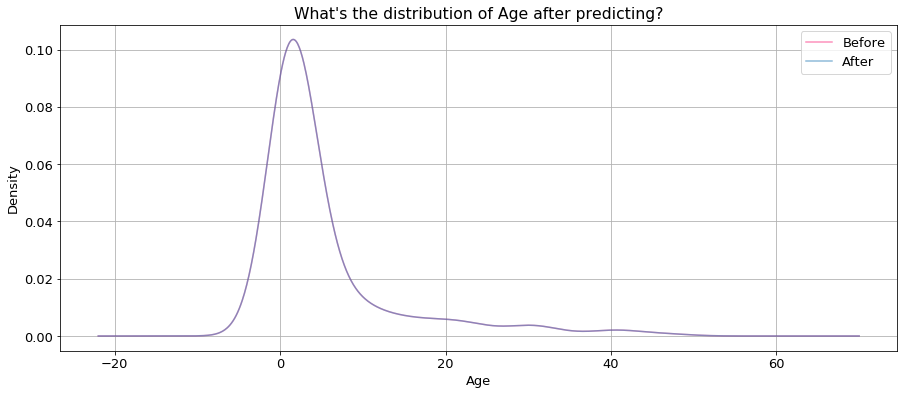

In [72]:
fig = plt.figure(figsize=(15, 6))
alpha = 0.5
full.Age.value_counts().plot(kind='density', color='red', label='Before', alpha=alpha)

pred = reg_xgb.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

full.Age.value_counts().plot(kind='density', color='blue', label='After', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age after predicting?" )
plt.legend(loc='best')
plt.grid()

In [75]:
full['NorAge'] = pd.Series(scaler.fit_transform(full.Age.values.reshape(-1,1)).reshape(-1), index=full.index)
full['NorNames'] = pd.Series(scaler.fit_transform(full.Names.values.reshape(-1,1)).reshape(-1), index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Group_num.values.reshape(-1,1)).reshape(-1), index=full.index)

/home/summer/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
for col in ['NorAge', 'NorFare', 'NorNames', 'Group_num']:
    setValue(col)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


#### Encoding sex, feamle: 0 and male: 1

In [78]:
train.Sex = np.where(train.Sex=='female', 0, 1)
test.Sex = np.where(test.Sex=='female', 0, 1)

#### Convert values of Embarked and Ticket into dummy variables

In [79]:
train.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
test.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)

In [83]:
train = pd.get_dummies(train, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test = pd.get_dummies(test, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
test['Title_Sir'] = pd.Series(0, index=test.index) #??

groupby

In [87]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [88]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

In [89]:
X = train.drop(['Survived'], axis=1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
X_train

,Sex,SibSp,Parch,Deck,Room,Group_num,NorAge,NorFare,NorNames,Embarked_C,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Group_size_L,Group_size_M,Group_size_S
298,1,0,0,1,0.006838,-0.558346,1.115038,-0.053673,-0.920208,0,...,0,0,0,1,0,0,0,0,0,1
884,1,0,0,0,0.000064,-0.558346,-0.361958,-0.507043,-0.075501,0,...,0,0,0,1,0,0,0,0,0,1
247,0,0,2,0,0.000064,0.705051,-0.435610,-0.363009,-0.075501,0,...,0,0,0,0,1,0,0,0,1,0
478,1,0,0,0,0.000064,-0.558346,-0.582913,-0.497941,-0.075501,0,...,0,0,0,1,0,0,0,0,0,1
305,1,1,2,1,0.001470,1.336749,-2.135486,2.286641,-0.075501,0,...,0,1,0,0,0,0,0,0,1,0
316,0,1,0,0,0.000064,0.073352,-0.435610,-0.140674,0.769206,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0.000064,-0.558346,-0.288307,-0.490126,-0.920208,0,...,0,0,1,0,0,0,0,0,0,1
405,1,1,0,0,0.000064,0.073352,0.300905,-0.237341,-0.920208,0,...,0,0,0,1,0,0,0,0,1,0
742,0,2,2,6,0.003707,1.968447,-0.656564,4.429271,0.769206,1,...,0,0,1,0,0,0,0,1,0,0
260,1,0,0,0,0.000064,-0.558346,0.976070,-0.493509,-0.920208,0,...,0,0,0,1,0,0,0,0,0,1


In [92]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

### KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, y_train, scoring)

0.8161434977578476
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


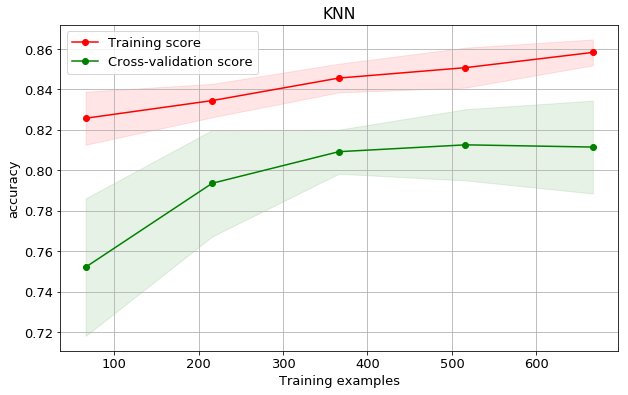

In [94]:
print (accuracy_score(y_test, clf_knn.predict(X_test)))
print (clf_knn)
plot_learning_curve(clf_knn, 'KNN', X, y, cv=4);

### Random Forest



In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc1 = get_model(rfc, parameters, X_train, y_train, scoring)

/home/summer/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8295964125560538
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)


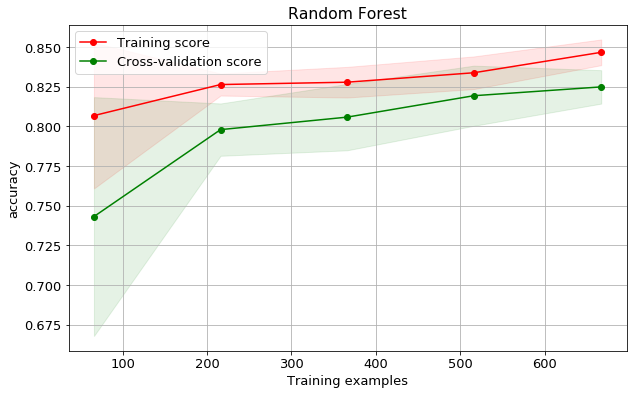

In [97]:
print (accuracy_score(y_test, clf_rfc1.predict(X_test)))
print (clf_rfc1)
plot_learning_curve(clf_rfc1, 'Random Forest', X, y, cv=4);

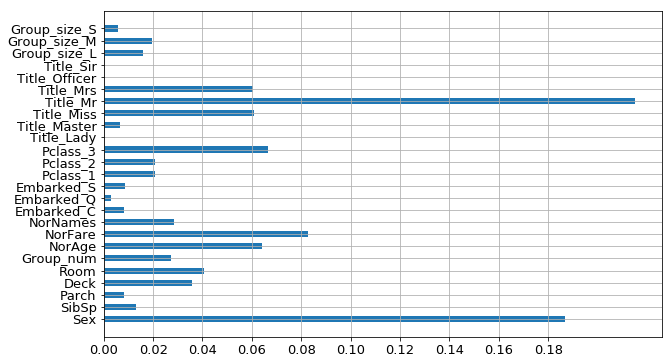

In [98]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(X_train.columns.shape[0]), clf_rfc1.feature_importances_, 0.5)
plt.yticks(np.arange(X_train.columns.shape[0]), X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02));

In [101]:
cols = X_train.columns[clf_rfc1.feature_importances_>=0.016]

In [102]:
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc2 = get_model(rfc, parameters, X_train[cols], y_train, scoring)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
0.8340807174887892


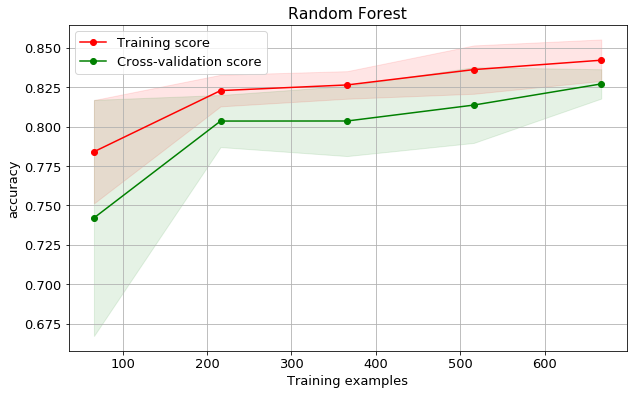

In [103]:
print (clf_rfc2)
print (accuracy_score(y_test, clf_rfc2.predict(X_test[cols])))
plot_learning_curve(clf_rfc2, 'Random Forest', X[cols], y, cv=4);

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}
clf_lg1 = get_model(lg, parameters, X_train, y_train, scoring)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8116591928251121


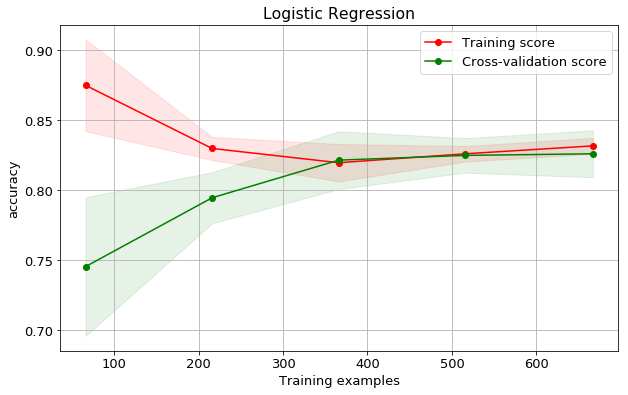

In [105]:
print (clf_lg1)
print (accuracy_score(y_test, clf_lg1.predict(X_test)))
plot_learning_curve(clf_lg1, 'Logistic Regression', X, y, cv=4);

### SVC

In [106]:
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='poly', probability=True)
parameters = {'C': [35], 'gamma': [0.0055], 'coef0': [0.1],
              'degree':[2]}
clf_svc = get_model(svc, parameters, X_train, y_train, scoring)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=2, gamma=0.0055, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.8385650224215246


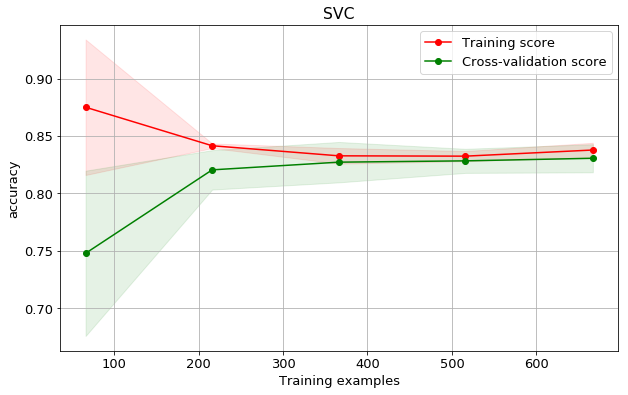

In [107]:
print (clf_svc)
print (accuracy_score(y_test, clf_svc.predict(X_test)))
plot_learning_curve(clf_svc, 'SVC', X, y, cv=4);

### XGBoost

In [108]:
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1],
              'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

0.8161434977578476
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=3.0, reg_lambda=4.0, scale_pos_weight=1, seed=42,
       silent=True, subsample=1)


/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

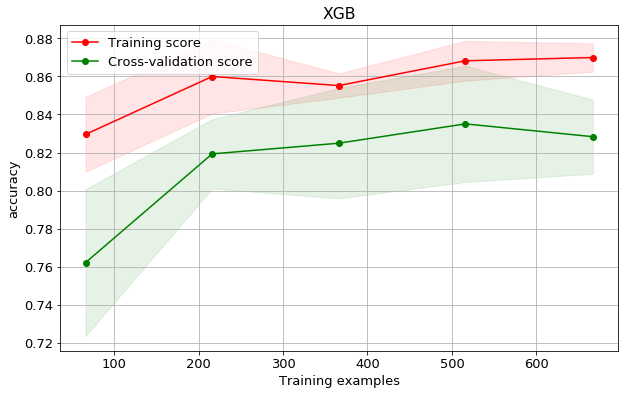

In [109]:
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)
plot_learning_curve(clf_xgb1, 'XGB', X, y, cv=4);

## Ensemble

In [110]:
from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators=[('xgb1', clf_xgb1), ('lg1', clf_lg1), ('svc', clf_svc), 
                                      ('rfc1', clf_rfc1),('rfc2', clf_rfc2), ('knn', clf_knn)], 
                          voting='hard', weights=[4,1,1,1,1,2])
clf_vc = clf_vc.fit(X_train, y_train)

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.820627802690583
VotingClassifier(estimators=[('xgb1', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', rando...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard',
         weights=[4, 1, 1, 1, 1, 2])


/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

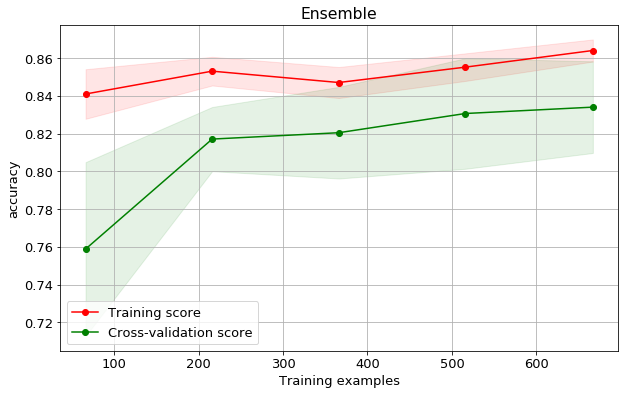

In [130]:
print (accuracy_score(y_test, clf_vc.predict(X_test)))
print (clf_vc)
plot_learning_curve(clf_vc, 'Ensemble', X, y, cv=4);

## Make submission

In [112]:
PassengerId = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)

In [113]:
def submission(model, fname, X):
    ans = pd.DataFrame(columns=['PassengerId', 'Survived'])
    ans.PassengerId = PassengerId
    ans.Survived = pd.Series(model.predict(X), index=ans.index)
    ans.to_csv(fname, index=False)

In [136]:
submission(clf_vc, 'ensemble.csv', test[X_test.columns])

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [121]:
ans = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [135]:
cols = X_test.columns
test[X_test.columns]

,Sex,SibSp,Parch,Deck,Room,Group_num,NorAge,NorFare,NorNames,Embarked_C,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Group_size_L,Group_size_M,Group_size_S
0,1,0,0,0,0.000064,-0.558346,0.337731,-0.491978,-0.920208,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0.000064,0.073352,1.258374,-0.508010,0.769206,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0.000064,-0.558346,2.363147,-0.456051,-0.075501,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.000064,-0.558346,-0.214655,-0.475868,-0.920208,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,1,0,0.000064,0.705051,-0.582913,-0.405784,1.613913,0,...,0,0,0,0,1,0,0,0,1,0
5,1,0,0,0,0.000064,-0.558346,-1.172125,-0.464993,-0.075501,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0.000064,-0.558346,0.006299,-0.495845,-0.920208,0,...,0,0,1,0,0,0,0,0,0,1
7,1,1,1,0,0.000064,0.705051,-0.288307,-0.082674,-0.075501,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0.000064,-0.558346,-0.877519,-0.503578,1.613913,1,...,0,0,0,0,1,0,0,0,0,1
9,1,2,0,0,0.000064,0.705051,-0.656564,-0.176441,-0.075501,0,...,0,0,0,1,0,0,0,0,1,0


In [128]:
test.columns

Index(['Sex', 'SibSp', 'Parch', 'Deck', 'Room', 'Group_num', 'NorAge',
       'NorFare', 'NorNames', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Group_size_L',
       'Group_size_M', 'Group_size_S', 'Title_Sir'],
      dtype='object')

In [129]:
X_test.columns

Index(['Sex', 'SibSp', 'Parch', 'Deck', 'Room', 'Group_num', 'NorAge',
       'NorFare', 'NorNames', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir',
       'Group_size_L', 'Group_size_M', 'Group_size_S'],
      dtype='object')

In [127]:
clf_rfc2.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 25 

In [124]:
ans

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
5,897,NaN
6,898,NaN
7,899,NaN
8,900,NaN
9,901,NaN


In [133]:
clf_vc.predict(X_test)
#clf_vc.predict(test)

/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/summer/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [119]:
submission(clf_vc, 'ensemble.csv', test)

ValueError: feature_names mismatch: ['Sex', 'SibSp', 'Parch', 'Deck', 'Room', 'Group_num', 'NorAge', 'NorFare', 'NorNames', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Group_size_L', 'Group_size_M', 'Group_size_S'] ['Sex', 'SibSp', 'Parch', 'Deck', 'Room', 'Group_num', 'NorAge', 'NorFare', 'NorNames', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Group_size_L', 'Group_size_M', 'Group_size_S', 'Title_Sir']

In [118]:
test

,Sex,SibSp,Parch,Deck,Room,Group_num,NorAge,NorFare,NorNames,Embarked_C,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Group_size_L,Group_size_M,Group_size_S,Title_Sir
0,1,0,0,0,0.000064,-0.558346,0.337731,-0.491978,-0.920208,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0.000064,0.073352,1.258374,-0.508010,0.769206,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0.000064,-0.558346,2.363147,-0.456051,-0.075501,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0.000064,-0.558346,-0.214655,-0.475868,-0.920208,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,1,0,0.000064,0.705051,-0.582913,-0.405784,1.613913,0,...,0,0,0,0,1,0,0,1,0,0
5,1,0,0,0,0.000064,-0.558346,-1.172125,-0.464993,-0.075501,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0.000064,-0.558346,0.006299,-0.495845,-0.920208,0,...,0,0,1,0,0,0,0,0,1,0
7,1,1,1,0,0.000064,0.705051,-0.288307,-0.082674,-0.075501,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,0,0,0.000064,-0.558346,-0.877519,-0.503578,1.613913,1,...,0,0,0,0,1,0,0,0,1,0
9,1,2,0,0,0.000064,0.705051,-0.656564,-0.176441,-0.075501,0,...,0,0,0,1,0,0,0,1,0,0


In [126]:
X_test

,Sex,SibSp,Parch,Deck,Room,Group_num,NorAge,NorFare,NorNames,Embarked_C,...,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Group_size_L,Group_size_M,Group_size_S
709,1,1,1,0,0.000064,0.705051,-1.846944,-0.348590,1.613913,1,...,0,1,0,0,0,0,0,0,1,0
439,1,0,0,0,0.000064,-0.558346,0.079950,-0.440342,0.769206,0,...,0,0,0,1,0,0,0,0,0,1
840,1,0,0,0,0.000064,-0.558346,-0.730216,-0.490126,-0.075501,0,...,0,0,0,1,0,0,0,0,0,1
720,0,0,1,0,0.000064,0.073352,-1.761337,-0.005340,0.769206,0,...,0,0,1,0,0,0,0,0,1,0
39,0,1,0,0,0.000064,0.073352,-1.172125,-0.426003,-0.920208,1,...,0,0,1,0,0,0,0,0,1,0
290,0,0,0,0,0.000064,-0.558346,-0.288307,0.881099,-0.075501,0,...,0,0,1,0,0,0,0,0,0,1
300,0,0,0,0,0.000064,-0.558346,-0.465730,-0.493509,1.613913,0,...,0,0,1,0,0,0,0,0,0,1
333,1,2,0,0,0.000064,0.705051,-1.024822,-0.295342,0.769206,0,...,0,0,0,1,0,0,0,0,1,0
208,0,0,0,0,0.000064,-0.558346,-1.024822,-0.493509,-0.075501,0,...,0,0,1,0,0,0,0,0,0,1
136,0,0,2,4,0.003067,0.705051,-0.803867,-0.135197,-0.075501,0,...,0,0,1,0,0,0,0,0,1,0
